# Community Detection on NIPS12 dataset

## We will visualize and detect the overlapping communities from the latent structure learned by the framework

In [1]:
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Markdown, display
from utils import plota_fn

def printmd(string):
    display(Markdown(string))

import scipy.io as sio

from input_data import load_data

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Embedding learned using the following command! The embedding learned is also attached for quick reference. For ease of visualization, we have taken K=10 and alpha=2.  

```python train.py --dataset nips12 --hidden 64_10 --alpha0 2 --split_idx 0 --reconstruct_x 0 --early_stopping 0 --deep_decoder 0 --split_idx 0 --model dglfrm --epochs 1000 --weighted_ce 1 --dropout 0```

The above command trains the DGLFRM model on 85% of the adjacency matrix.

In [2]:
nips12 = np.load('data/qual_nips12_dglfrm_for_analysis.npz')
# nips12_vae = np.load('data/qual_nips12_gcn_vae.npz')
print nips12.keys()

nips_author = sio.loadmat('data/nips12authors.mat')
nips_author_names = nips_author['anames']

['z_out', 'z_real', 'z_discrete', 'adj_rec']


## Creating the node embedding z_n = b_n * r_n 

#### where " * " is the element wise product.

**Average activated communities: 4.16200294551**

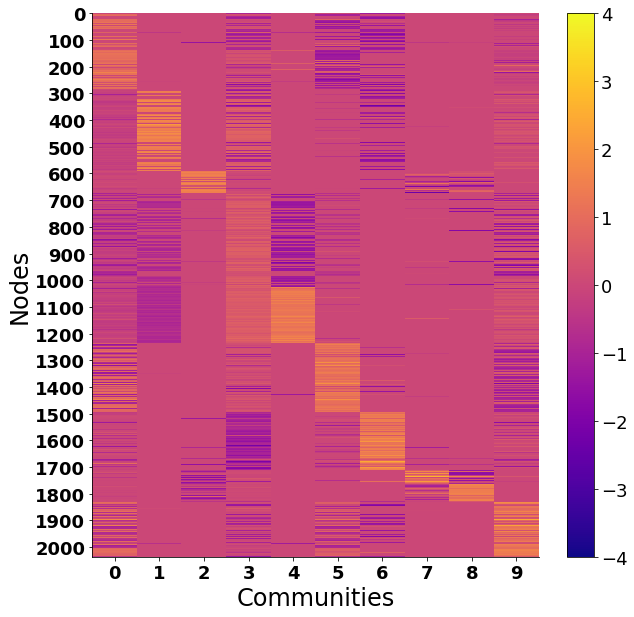

In [3]:
size = (10, 10)

b = np.round(nips12['z_discrete'])
r = nips12['z_real']

avg_activated_communities = np.sum(b) / b.shape[0]
z = np.multiply(r, b)

# Reordering the communities (Columns of Z) for visualization.
total_community_strength = np.sum(z, axis=0)
new_community_idx = np.argsort(-total_community_strength)
z = z[:, new_community_idx] 

# Reordering the nodes (Rows of Z) such that nodes having 
# high strength for communities with lower indices are on top.
max_node_community_idx = np.argmax(z, axis=1)
new_node_idx = np.argsort(max_node_community_idx)
z = z[new_node_idx, :]

# Since we re-ordered the nodes, we should re-arrange the author_names as well
author_names = nips_author_names[new_node_idx, :]

printmd ("**Average activated communities: {}**".format(avg_activated_communities))
plota_fn(z, size, 'plasma', f_name="", x_step=1, y_step=100, vmin=-4, vmax=4, x_label='Communities')

## Print authors in communities

In [4]:
# Sort all authors based on their strength
sorted_d = np.argsort(-z, axis=0) # Sort all authors and get indices
num_authors = len(sorted_d)

M = 50 # Numbers of authors to print per community
author_positive = sorted_d[0:M,:] # Get top M for all comm
author_negative = sorted_d[num_authors-M:,:] # Get bottom 10 authors for all comm
# Note: Both high negative and high positive strengths can form communities.

def flat (author_names, col='blue'):
    author_list = ''
        
    for arr_name in author_names:        
        author_list += arr_name[0][0] + ', '
    return author_list

print ('Ordering is based on strength of the membership in a community. We are printing top {} authors.'.format(M))

K = 10 # Number of communities to print.
for i in np.arange(K):
    printmd ('**Community {}**'.format(2*i))
    print (flat(np.flip(author_names[author_negative[:,i]], 0)))
    printmd ('**Community {}**'.format(2*i+1))
    print (flat(author_names[author_positive[:,i]]))

Ordering is based on strength of the membership in a community. We are printing top 50 authors.


**Community 0**

Koch_C, Bower_J, Moore_A, Coolen_A, Moody_J, Horiuchi_T, DeWeerth_S, Bair_W, Tishby_N, Saad_D, Harris_J, Bialek_W, Etienne-Cummings_R, Pentland_A, Siegelmann_H, Mueller_P, Gluck_M, Principe_J, Donham_C, Moss_E, Tresp_V, Abu-Mostafa_Y, Warmuth_M, Ruderman_D, Dorffner_G, Lee_D, Luo_J, Atkeson_C, Seung_H, Dietterich_T, Kammen_D, Ballard_D, VanderSpiegel_J, Hasselmo_M, Blackman_D, Doyon_B, Lazzaro_J, Kabashima_Y, Merzenich_M, Braun_J, Li_H, Touretzky_D, Lange_D, Chiu_T, Schaal_S, Cavazos_J, Ceci_L, Waugh_F, Clare_T, Sivilotti_M, 


**Community 1**

Sejnowski_T, Spence_C, Barto_A, Muller_K, Dayan_P, Platt_J, Scholkopf_B, Mozer_M, Smola_A, Gelfand_J, Meir_R, Bartlett_P, Alspector_J, Goldstein_M, Ziehe_A, Obermayer_K, Peterson_R, Shawe-Taylor_J, Baldi_P, Stork_D, Yuhas_B, Pearson_J, Venkatesh_S, Williamson_R, Sajda_P, Brown_T, Sutton_R, Allen_R, Lockery_S, Wiles_J, Parra_L, Singh_S, Pawelzik_K, Geiger_D, Tenorio_M, Oja_E, Burges_C, Movellan_J, Jenkins_R, Jayakumar_A, Servan-Schreiber_D, Weston_J, Geisel_T, Barr_A, Marchand_M, Niranjan_M, Andreou_A, Golea_M, Hari_R, Sullivan_W, 


**Community 2**

Cowan_J, Chiang_Y, Hanson_S, Shavlik_J, Wang_D, Munro_P, Schreiner_C, Roychowdhury_V, Potter_D, Darken_C, van-Schaik_A, Baluja_S, Tsoi_A, Geman_S, Kuhn_G, Hancock_E, Bertoni_A, Williamson_M, Tsitsiklis_J, Kailath_T, Burnod_Y, Friedman_A, vanHemmen_J, Forsyth_D, Thakoor_A, Murray-Smith_R, Ke_L, Ullman_S, Towell_G, Campadelli_P, Fragniere_E, Wong_K, Linden_A, Serrano-Gotarredona_T, Klopf_A, Archie_K, Abdallah_C, Jacobs_E, Samad_T, Paugam-Moisy_H, Vidal_J, Gish_S, Kolen_J, Thrasher_C, O'Keefe_J, Mejia_C, Mamelak_A, Shultz_T, Becker_S, Vasconcelos_N, 


**Community 3**

Edelman_S, Ruppin_E, Horn_D, Cooper_L, Weinshall_D, Intrator_N, Meilijson_I, Eeckman_F, Bert_J, Marshall_J, Kersten_D, Flash_T, Buhmann_J, Sabisch._T, Sin_C, Linder_T, Paris_B, Elbaurn_C, Bolouri_H, Jourjine_A, Ferguson_A, Reilly_D, Rickard_S, Schwaber_J, Lewis_E, Zeger_K, Ruanaidh_J, Rivest_R, Plate_T, Toomarian_N, Pong_T, Miyamoto_M, Willshaw_D, Gdalyahu_Y, Krzyzak_A, Parberry_I, Rosca_J, Petsche_T, Timmerman_D, Porod_W, Held_M, Moteau_Y, Abramowicz_H, Scheich_H, Sangiovanni-Vincentelli_A, Vandewalle_J, Michel_A, Gonye_G, Werblin_F, Verrelst_H, 


**Community 4**

Anderson_C, Yuan_J, Latham_P, Malik_J, Schuster_M, Vu_V, Phillips_P, Malkoff_D, Lang_K, Annaswamy_A, Pelillo_M, Langenbacher_H, Davies_S, Robinson_D, Risau-Gusman_S, Page_E, Nadeau_C, Montana_D, Bennett_K, Schmitt_M, Goebel_R, Bloesch_A, Wiklicky_H, Shepard_R, Camana_R, Smotroff_I, Honrubia_V, Fleisher_M, Schuurmans_D, Hamey_L, Shepanski_J, Lau_C, Crites_R, Dickinson_B, Neugebauer_C, Sahar_S, Saund_E, Alpaydin_E, Ratsaby_J, Wulff_N, Singer_A, Sona_D, Tanaka_S, Frasconi_P, Bengio_Y, Negishi_M, Holmann_T, McCartor_H, Ghosn_J, Kannappan_S, 


**Community 5**

Walter_J, Leong_H, Berthold_M, Waskiewicz_J, Lewis_M, Caprile_B, Siegel_R, Santos_E, Grove_A, Weijters_T, Henkel_R, Vovk_V, Finch_S, Rueget_S, Hayashi_Y, Randlov_J, Bonds_A, Rosenholtz_R, Cho_J, Zak_M, Hornel_D, Liu_Y, Szepesvfixi_C, Leinbach_J, Noest_A, Sallans_B, Chover_J, Chou_P, Alvelda_P, Smythe_E, Hirai_Y, Neal_R, Faggin_F, Wittner_B, Loos_H, Sundararajan_S, Torkkola_K, Collard_J, Orr_G, Derthick_M, Iso_K, Grupen_R, Wejchert_J, Kamnanithi_N, Fernandez_M, Seeger_M, Margaritis_D, Cones_C, Duffy_N, Gordon_G, 


**Community 6**

Hinton_G, Guyon_I, Jordan_M, LeCun_Y, Giles_C, Simard_P, Schapire_R, Opper_M, Bengio_Y, Personnaz_L, Denker_J, MacKay_D, Dreyfus_G, Xu_L, Yuille_A, Bishop_C, Kawato_M, Morgan_N, Graf_H, Murray_A, Cottrell_G, Henderson_D, Waibel_A, Ghahramani_Z, Atlas_L, Jackel_L, Mjolsness_E, Williams_C, Smimakis_S, Solla_S, Jabri_M, Linster_C, Kerszberg_M, Plutowski_M, Singer_Y, Boser_B, Lee_Y, Lippmann_R, Parr_R, Johnson_D, Haussler_D, Kearns_M, Sackinger_E, Bottou_L, Wawrzynek_J, Martin_G, Nadal_J, Horne_B, Robinson_A, Marks_R, 


**Community 7**

Shavlik_J, Blair_A, Roychowdhury_V, Cowan_J, Peper_F, Maass_W, Horn_D, Toomarian_N, Hanson_S, Cooper_L, Paris_B, Tokar_R, Ruppin_E, Intrator_N, Baluja_S, Yang_M, Edelman_S, Poggio_T, Munro_P, Tsoi_A, Schwartz_R, Kailath_T, Gerstner_W, Siu_K, Kennedy_J, Liu_Z, Roth_D, Finch_A, Tonkes_B, Blake_A, Eeckman_F, Sabisch._T, Harp_S, Wang_D, Gersho_A, Ullman_S, Kuhn_G, Christy_P, Bontempi_G, Tsitsiklis_J, Gunzinger_A, Perrone_M, Pinter_R, Abramowicz_H, Serrano-Gotarredona_T, Weinshall_D, Morciniec_M, Meilijson_I, Lapedes_A, Pratt_L, 


**Community 8**

Cowan_J, Shavlik_J, Munro_P, Tsitsiklis_J, Hancock_E, Hanson_S, Thakoor_A, Paugam-Moisy_H, Ullman_S, Wang_D, Vidal_J, Finch_A, Lapedes_A, Kuhn_G, Gerstner_W, vanHemmen_J, Webb_B, Marcantonio_A, Santoso_I, Nachtigall_P, Moore_P, Towell_G, Chuang_M, Skinner_S, Darken_C, Ke_L, Cummings_K, Khanna_S, Behrman_E, Gunzinger_A, Kocheisen_M, Chu_P, Roitblat_H, Petsehe_T, Huet_B, Kempter_R, Muller_U, LaFranchise_J, Harget_A, Cauwenberghs_G, Stechert_A, Wagner_H, Lyon_R, Heileman_G, Lemarie_B, Penner_R, Steck_J, Samad_T, Pratt_L, Mamelak_A, 


**Community 9**

Roychowdhury_V, Baluja_S, van-Schaik_A, Poggio_T, Kailath_T, Linden_A, Xiang_D, Maass_W, Thrun_S, Siu_K, Gersho_A, Mangasarian_O, Mejia_C, Tsoi_A, Badran_F, von-zur-Muhlen_A, Granger_E, Zhang_N, Shultz_T, Pollack_J, Prank_K, Dembo_A, Dyer_M, Vittoz_E, Goodman_J, Holland_J, Rose_K, Bruck_J, Rigoll_G, Morpurgo_A, Campadelli_P, Fragniere_E, Takane_Y, Mori_Y, Sontag_E, Choi_S, Thiria_S, Weber_Weber, Saunders_G, Corderoy_A, Smolensky_P, Kenyon_G, Huertas_J, Yeung_D, Richards-Kortum_R, Elman_J, Hornik_K, Ghosh_J, Grossberg_S, Legendre_G, 


**Community 10**

Barto_A, Smola_A, Bartlett_P, Scholkopf_B, Meir_R, Sutton_R, Shawe-Taylor_J, Andreou_A, Alspector_J, Williamson_R, Geiger_D, Wiles_J, Brown_T, Allen_R, Oja_E, Marchand_M, Singh_S, Tenorio_M, Tishby_N, Weston_J, Niranjan_M, Golea_M, Mika_S, Geisel_T, Jousmaki_V, Pawelzik_K, Platt_J, Doucet_A, Ratsch_G, Claiborne_B, Hoyer_P, Burges_C, Perkins_T, Mansour_Y, Lee_W, Kadirkamanathan_V, Tresp_V, Jayakumar_A, de-Freitas_J, Fine_T, Douglass_J, Hari_R, Christian_J, Kowalczyk_A, Dennis_S, Vigario_R, Kontoravdis_D, Ozaki_H, Tang_D, Saha_A, 


**Community 11**

Sejnowski_T, Goodman_R, Moody_J, Yang_H, Chauvin_Y, Coolen_A, Krogh_A, Henkle_V, Obermayer_K, Baldi_P, Saad_D, Moore_A, Sollich_P, Brunak_S, Finke_M, Amari_S, Schley_C, Golden_R, Allman_J, Gluck_M, Cichocki_A, Movellan_J, Fox_G, Doya_K, Zemel_R, Siegelmann_H, Smyth_P, Viola_P, Hertz_J, Mayhew_J, Dietterich_T, Pavel_M, Murata_N, Klein_R, Lee_T, Dayan_P, Makeig_S, Nabney_I, Shemngton_D, Leen_T, Zhang_L, Pouget_A, Barber_D, Fredholm_H, Hansen_L, Cessac_B, Mueller_K, Murayama_T, Cotterill_R, Ritter_H, 


**Community 12**

Jordan_M, Kawato_M, Murray_A, Bishop_C, Atlas_L, Wolpert_D, Opper_M, Abbott_L, Ghahramani_Z, Cole_R, Reekie_H, VandenBout_D, Williams_C, Churcher_S, Nadal_J, Miikkulainen_R, Marks_R, Beer_R, Tarassenko_L, Parga_N, Connor_J, Seneft_S, Parr_R, Shadmehr_R, Brownlow_M, Wang_X, Goodine_D, Vatikiotis-Bateson_E, Zue_V, Todorov_E, Makarenko_V, Haynes_P, El-Sharkawi_M, Marder_E, Bilbro_G, Jaakkola_T, Polifroni_J, Snyder_W, Reeves_D, Smith_M, Kioke_Y, Uno_Y, Chiel_H, Glass_J, Personnaz_L, Winther_O, Todd_T, Borisyuk_G, Koller_D, Ambros-Ingerson_J, 


**Community 13**

Giles_C, Cottrell_G, Bengio_Y, Graf_H, Morgan_N, Lippmann_R, Jabri_M, Mjolsness_E, Waibel_A, Plutowski_M, Denker_J, Johnson_D, Lee_Y, Horne_B, Jackel_L, Wawrzynek_J, Simard_P, Schmidbauer_O, Martin_G, Jain_A, MacKay_D, Guyon_I, Henderson_D, Mahowald_M, Robinson_A, Cohen_M, LeCun_Y, Sloboda_T, De-Mori_R, Flower_B, Solla_S, Keeler_J, Bourlard_H, Bakker_R, Tebelskis_J, Schouten_J, Saito_H, Chen_H, Bottou_L, Xie_Y, Coggins_R, Wu_J, McNair_A, Howard_R, Coppens_M, Chapman_D, Schwartz_D, Boser_B, Baird_H, Beck_J, 


**Community 14**

Sundararajan_S, Bengio_Y, Monaco_J, Metcalfe_J, Margaritis_D, Fukumizu_K, Metz_C, Kamimura_R, Ghosn_J, Langenbacher_H, Borg-Graham_L, Mace_C, Bowman_C, Pinkas_G, Schfitze_H, Long_T, Schuster_M, Koistinen_P, Holmann_T, Leong_H, Fritzke_B, Cooper_L, Houde_J, Hihi_S, Montana_D, Hendler_J, Singer_A, Kanwal_J, Linsker_R, Freidman_J, Tang_A, Burgess_A, Nadeau_C, Konishi_M, Hartstein_A, Riis_S, Cai_D, Rogers_D, Camana_R, Choukri_K, Finch_S, Rossen_M, Laskov_P, Harrison_R, McCallum_R, Stolorz_P, Sakurai_A, Hochreiter_S, Wynne-Jones_M, Bennett_K, 


**Community 15**

Kremer_S, Wejchert_J, Haffner_P, Page_E, Brand_M, Murphy_K, Lambert_R, Simmons_J, Smith_L, Tanaka_S, Stocker_A, McCartor_H, Sereno_M, Orr_G, Gordon_M, Hadden_L, Piepenbrock_C, Loch_J, Walter_J, Szepesvfixi_C, Wiklicky_H, Jojic_N, Risau-Gusman_S, Phillips_P, Marion_G, Moss_E, Kannappan_S, Salu_Y, Chou_P, Henkel_R, Lemmon_M, Palm_G, Suarez_H, Harris-Warrick_R, Postma_E, Belew_R, Levemon_M, Kambhatla_N, Gately_M, Anderson_C, Schmitt_M, Suzuki_S, Gaudiano_P, Winter_C, Neal_R, Cole_C, Singhal_S, Wulff_N, Faggin_F, Mathieson_M, 


**Community 16**

Marts_A, Sereno_M, Burgess_A, Stolorz_P, Asogawa_M, Levemon_M, Freeman_D, Pareigis_S, Ring_M, Glover_M, Yariv_A, Zhang_T, Stocker_A, Sahar-Pikielny_C, Hendler_J, Ando_H, Pinkas_G, Murphy_K, Rhodes_P, Davis_L, Smith_A, Gourley_R, Marko_K, Williams_P, Harris-Warrick_R, Windecker_R, Rauschecker_J, Hollatz_J, Palm_G, Keerthi_S, Blasig_R, Howe_N, Carreira-Perpinan_M, Suzuki_S, Laskov_P, Macy_S, Matic_N, Demiriz_A, Thmn_S, Peterson_J, Gately_M, Jojic_N, Linsker_R, Holmstrom_L, Ng_K, Lumer_E, McCallum_R, Holler_M, Cohen_E, Matsuoka_Y, 


**Community 17**

Zeitouni_O, Carley_L, Duda_R, Hormel_M, Kremer_S, Lemmon_M, Slaney_M, Tam_D, Cole_C, Hartstein_A, Glassman_M, Braitenberg_V, Rogers_D, Borg-Graham_L, Smith_L, Lambert_R, Choukri_K, MacDonald_B, Rossen_M, Lappe_M, Brown_N, Metz_C, SanMartin_A, Freidman_J, Mathieson_M, Brand_M, Love_B, Sakurai_A, Salu_Y, Kruschke_J, Koistinen_P, Flann_N, Robel_A, Gordon_M, Gaudiano_P, Zipser_D, Heskes_T, Sommex_F, Watanabe_S, Loch_J, Wynne-Jones_M, Winter_C, Donoghue_J, Blair_H, Sorheim_E, Dong_D, Webb_A, Siegel_M, Saund_E, Honrubia_V, 


**Community 18**

Koch_C, Sejnowski_T, Ruderman_D, Bower_J, Dayan_P, Mel_B, Obermayer_K, Touretzky_D, Harris_J, Bair_W, Bialek_W, DeWeerth_S, Pearlmutter_B, Etienne-Cummings_R, Mueller_P, Precup_D, Rao_R, Principe_J, Ballard_D, Pentland_A, Abu-Mostafa_Y, Luo_J, Chiu_T, Dorffner_G, Mathur_B, Moss_E, Warmuth_M, Omohundro_S, Blackman_D, VanderSpiegel_J, Clare_T, Viola_P, Rosenfeld_R, Horiuchi_T, Stefanovic_D, Amari_S, Kammen_D, Donham_C, Li_H, Niebur_E, Singh_S, Scheeff_D, Tang_A, Hertz_J, Cavazos_J, Ziehe_A, Walker_M, Liu_S, Goodman_R, Haghighi_S, 


**Community 19**

Mozer_M, Stork_D, Tishby_N, Tresp_V, Wolff_G, Ohmi_T, McNaughton_B, Yamashita_T, Nakashima_M, Burr_J, Psaltis_D, Leung_M, Deco_G, Jang_J, Watanabe_T, Shibata_T, Kritayakirana_K, Peterson_A, Benkert_C, Keesing_R, Murray_M, Anderson_D, Hebler_V, Grebert_I, Seung_H, Nakai_T, Skaggs_W, Kosaka_H, Rymer_W, Kaushansky_H, Stern_E, Montgomery_D, Barr_A, Heckman_C, Boonyanit_K, Kotani_K, Markus_E, Schwartz_E, Morimoto_T, Ishii_H, Jouny_I, Sperduti_A, Wolniewicz_R, Kudrimoti_H, Ji_C, Maltenfort_M, Matsumoto_K, Kaihara_R, Kirk_D, Kerns_D, 


## Example of communities inferred on a random split: 

Community 6: Hinton_G, Jordan_M, LeCun_Y, Bengio_Y, Bishop_C, Williams_C ... 

Community 10: Barto_A, Sutton_R, Singh_S ...

Community 12: Jordan_M, Bishop_C, ..

Community 18: Sejnowski_T, Pearlmutter_B, Abu-Mostafa_Y, Tang_A